<a href="https://colab.research.google.com/github/viniciusriosfuck/SQLwithPython/blob/main/SQLwithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SQL with Python






## General stuff

https://www.udemy.com/course/learn-microsoft-sql-t-sql-beginner-to-expert/

ANSI: American National Standards Institute

T-SQL: Transact SQL (Microsoft): declarative

PL/SQL: (Oracle)


RDBMS: Relation Database Management System

SQL Server (Microsoft): RDBMS

Oracle, MySQL, PostgreSQL

Normalization Levels: Forms (1,2,3NF)
* avoid data redundancy with use of Foreign Keys
* 1NF
    * elimante repeating groups of entities into individual tables
* 2NF
    * create separate tables for sets of values that apply to multiple records
* 3NF
    * Eliminates fields that does not depende on the PK

## Pandas as SQL

https://towardsdatascience.com/using-the-pandas-data-frame-as-a-database-282edec5a3ab

In [1]:
import pandas as pd

df = pd.DataFrame({'Company Name':['Google', 'Microsoft', 'SpaceX', 'Amazon', 'Samsung'], 
                   'Founders':['Larry Page, Sergey Brin', 'Bill Gates, Paul Allen','Elon Musk','Jeff Bezos', 'Lee Byung-chul'], 
                   'Founded': [1998, 1975, 2002, 1994, 1938], 
                   'Number of Employees': ['103,459', '144,106', '6,500', '647,500', '320,671']})
df


,Company Name,Founders,Founded,Number of Employees
0,Google,"Larry Page, Sergey Brin",1998,"103,459"
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


### Insert / Append

In [2]:
df1 = pd.DataFrame({'Company Name':['WhatsApp'], 'Founders':['Jan Koum, Brian Acton'], 'Founded': [2009], 'Number of Employees': ['50'] })

df = df.append(df1, ignore_index=True)
df

,Company Name,Founders,Founded,Number of Employees
0,Google,"Larry Page, Sergey Brin",1998,"103,459"
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"
5,WhatsApp,"Jan Koum, Brian Acton",2009,50


### Delete / Drop

In [3]:
df = df.drop([df.index[5]])
df

,Company Name,Founders,Founded,Number of Employees
0,Google,"Larry Page, Sergey Brin",1998,"103,459"
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


In [4]:
df = df[df.Founders != 'Larry Page, Sergey Brin']
df

,Company Name,Founders,Founded,Number of Employees
1,Microsoft,"Bill Gates, Paul Allen",1975,"144,106"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


### Select / loc / iloc

In [5]:
df.loc[2]

Company Name              SpaceX
Founders               Elon Musk
Founded                     2002
Number of Employees        6,500
Name: 2, dtype: object

### Update / at

In [6]:
df.at[1, 'Number of Employees'] = '200,000'
df # This is after the change of value (Microsoft)

,Company Name,Founders,Founded,Number of Employees
1,Microsoft,"Bill Gates, Paul Allen",1975,"200,000"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,Samsung,Lee Byung-chul,1938,"320,671"


In [7]:
df.iloc[3] = ['YouTube', 'Chad Hurley, Steve Chen, Jawed Karim', 2005, '2,800']
df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1758: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,Company Name,Founders,Founded,Number of Employees
1,Microsoft,"Bill Gates, Paul Allen",1975,"200,000"
2,SpaceX,Elon Musk,2002,"6,500"
3,Amazon,Jeff Bezos,1994,"647,500"
4,YouTube,"Chad Hurley, Steve Chen, Jawed Karim",2005,"2,800"


## SQL in Pandas (sqlalchemy)

https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure

### df to SQL

In [8]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

df = pd.DataFrame({'name' : ['User 1', 'User 2', 'User 3']})
df.to_sql('users', con=engine)
engine.execute("SELECT * FROM users").fetchall()


[(0, 'User 1'), (1, 'User 2'), (2, 'User 3')]

In [9]:
with engine.begin() as connection:
    df1 = pd.DataFrame({'name' : ['User 4', 'User 5']})
    df1.to_sql('users', con=connection, if_exists='append')
engine.execute("SELECT * FROM users").fetchall()

[(0, 'User 1'), (1, 'User 2'), (2, 'User 3'), (0, 'User 4'), (1, 'User 5')]

In [10]:
df2 = pd.DataFrame({'name' : ['User 6', 'User 7']})
df2.to_sql('users', con=engine, if_exists='append')
engine.execute("SELECT * FROM users").fetchall()

[(0, 'User 1'),
 (1, 'User 2'),
 (2, 'User 3'),
 (0, 'User 4'),
 (1, 'User 5'),
 (0, 'User 6'),
 (1, 'User 7')]

In [11]:
df2.to_sql('users', con=engine, if_exists='replace',
           index_label='id')
engine.execute("SELECT * FROM users").fetchall()

[(0, 'User 6'), (1, 'User 7')]

In [12]:
df = pd.DataFrame({"A": [1, None, 2]})
from sqlalchemy.types import Integer
df.to_sql('integers', con=engine, index=False,
          dtype={"A": Integer()})
engine.execute("SELECT * FROM integers").fetchall()

[(1,), (None,), (2,)]

https://docs.sqlalchemy.org/en/14/core/metadata.html

In [13]:
from sqlalchemy import *

metadata = MetaData()

user = Table('user', metadata,
    Column('user_id', Integer, primary_key=True),
    Column('user_name', String(16), nullable=False),
    Column('email_address', String(60)),
    Column('nickname', String(50), nullable=False)
)

for t in metadata.sorted_tables:
    print(t.name)

user


In [14]:
employees = Table('employees', metadata,
    Column('employee_id', Integer, primary_key=True),
    Column('employee_name', String(60), nullable=False),
    Column('employee_dept', Integer, ForeignKey("departments.department_id"))
)

In [15]:
# access the column "EMPLOYEE_ID":
employees.columns.employee_id

# or just
employees.c.employee_id

# via string
employees.c['employee_id']

# iterate through all columns
for c in employees.c:
    print(c)

# get the table's primary key columns
for primary_key in employees.primary_key:
    print(primary_key)

# get the table's foreign key objects:
for fkey in employees.foreign_keys:
    print(fkey)

# access the table's MetaData:
employees.metadata

# access the table's bound Engine or Connection, if its MetaData is bound:
employees.bind

# access a column's name, type, nullable, primary key, foreign key
employees.c.employee_id.name
employees.c.employee_id.type
employees.c.employee_id.nullable
employees.c.employee_id.primary_key
employees.c.employee_dept.foreign_keys

# get the "key" of a column, which defaults to its name, but can
# be any user-defined string:
employees.c.employee_name.key

# access a column's table:
employees.c.employee_id.table is employees

# get the table related by a foreign key
# list(employees.c.employee_dept.foreign_keys)[0].column.table

employees.employee_id
employees.employee_name
employees.employee_dept
employees.employee_id
ForeignKey('departments.department_id')


True

In [16]:
engine = create_engine('sqlite:///:memory:')

metadata = MetaData()

user = Table('user', metadata,
    Column('user_id', Integer, primary_key=True),
    Column('user_name', String(16), nullable=False),
    Column('email_address', String(60), key='email'),
    Column('nickname', String(50), nullable=False)
)

user_prefs = Table('user_prefs', metadata,
    Column('pref_id', Integer, primary_key=True),
    Column('user_id', Integer, ForeignKey("user.user_id"), nullable=False),
    Column('pref_name', String(40), nullable=False),
    Column('pref_value', String(100))
)

metadata.create_all(engine)

In [17]:
engine = create_engine('sqlite:///:memory:')

meta = MetaData()

employees = Table('employees', meta,
    Column('employee_id', Integer, primary_key=True),
    Column('employee_name', String(60), nullable=False, key='name'),
    # Column('employee_dept', Integer, ForeignKey("departments.department_id"))
)
employees.create(engine)

In [18]:
employees.drop(engine)

In [19]:
employees.create(engine, checkfirst=True)
employees.drop(engine, checkfirst=False)

In [20]:
metadata = MetaData()

financial_info = Table(
    'financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('value', String(100), nullable=False),
    schema='remote_banks'
)

In [21]:
# print(select(financial_info))

In [22]:
metadata.tables['remote_banks.financial_info']

Table('financial_info', MetaData(bind=None), Column('id', Integer(), table=<financial_info>, primary_key=True, nullable=False), Column('value', String(length=100), table=<financial_info>, nullable=False), schema='remote_banks')

In [23]:
customer = Table(
    "customer",
    metadata,
    Column('id', Integer, primary_key=True),
    Column('financial_info_id', ForeignKey("remote_banks.financial_info.id")),
    schema='remote_banks'
)

In [24]:
schema="dbo.scott"

In [25]:
metadata = MetaData(schema="remote_banks")

financial_info = Table(
    'financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('value', String(100), nullable=False),
)

In [26]:
# either will work:

refers_to_financial_info = Table(
    'refers_to_financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('fiid', ForeignKey('financial_info.id')),
)


# or

# refers_to_financial_info = Table(
#     'refers_to_financial_info',
#     metadata,
#     Column('id', Integer, primary_key=True),
#     Column('fiid', ForeignKey('remote_banks.financial_info.id')),
# )

In [27]:
from sqlalchemy import BLANK_SCHEMA

metadata = MetaData(schema="remote_banks")

financial_info = Table(
    'financial_info',
    metadata,
    Column('id', Integer, primary_key=True),
    Column('value', String(100), nullable=False),
    schema=BLANK_SCHEMA  # will not use "remote_banks"
)

In [28]:
addresses = Table('engine_email_addresses', meta,
    Column('address_id', Integer, primary_key=True),
    # Column('remote_user_id', Integer, ForeignKey(users.c.user_id)),
    Column('email_address', String(20)),
    mysql_engine='InnoDB'
)

In [29]:
for t in metadata.sorted_tables:
    print(t.name)

financial_info


# PandasSQL

https://pypi.org/project/pandasql/

https://www.kdnuggets.com/2017/02/python-speak-sql-pandasql.html

In [30]:
!pip install pandasql

In [31]:
#Checking out meat and birth data
from pandasql import sqldf
from pandasql import load_meat, load_births

meat = load_meat()
births = load_births()

#You can inspect the dataframes directly if you're using Rodeo
#These print statements are here just in case you want to check out your data in the editor, too
print(meat.head())
births.head()

        date   beef   veal  ...  broilers  other_chicken  turkey
0 1944-01-01  751.0   85.0  ...       NaN            NaN     NaN
1 1944-02-01  713.0   77.0  ...       NaN            NaN     NaN
2 1944-03-01  741.0   90.0  ...       NaN            NaN     NaN
3 1944-04-01  650.0   89.0  ...       NaN            NaN     NaN
4 1944-05-01  681.0  106.0  ...       NaN            NaN     NaN

[5 rows x 8 columns]


,date,births
0,1975-01-01,265775
1,1975-02-01,241045
2,1975-03-01,268849
3,1975-04-01,247455
4,1975-05-01,254545


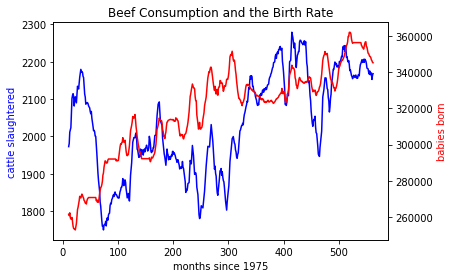

In [32]:
# Let's make a graph to visualize the data
# Bet you haven't had a title quite like this before
import matplotlib.pyplot as plt
from pandasql import *
import pandas as pd

pysqldf = lambda q: sqldf(q, globals())

q  = """
SELECT
  m.date
  , m.beef
  , b.births
FROM
  meat m
LEFT JOIN
  births b
    ON m.date = b.date
WHERE
    m.date > '1974-12-31';
"""

meat = load_meat()
births = load_births()

df = pysqldf(q)
df.births = df.births.fillna(method='backfill')

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(df[['beef']].rolling(12).mean(), color='b')
ax1.set_xlabel('months since 1975')
ax1.set_ylabel('cattle slaughtered', color='b')

ax2 = ax1.twinx()
ax2.plot(df[['births']].rolling(12).mean(), color='r')
ax2.set_ylabel('babies born', color='r')
plt.title("Beef Consumption and the Birth Rate")
plt.show()

In [33]:
q = """
    SELECT
        *
    FROM
        meat
    LIMIT 10;"""

print(sqldf(q, locals()))

                         date   beef   veal  ...  broilers  other_chicken turkey
0  1944-01-01 00:00:00.000000  751.0   85.0  ...      None           None   None
1  1944-02-01 00:00:00.000000  713.0   77.0  ...      None           None   None
2  1944-03-01 00:00:00.000000  741.0   90.0  ...      None           None   None
3  1944-04-01 00:00:00.000000  650.0   89.0  ...      None           None   None
4  1944-05-01 00:00:00.000000  681.0  106.0  ...      None           None   None
5  1944-06-01 00:00:00.000000  658.0  125.0  ...      None           None   None
6  1944-07-01 00:00:00.000000  662.0  142.0  ...      None           None   None
7  1944-08-01 00:00:00.000000  787.0  175.0  ...      None           None   None
8  1944-09-01 00:00:00.000000  774.0  182.0  ...      None           None   None
9  1944-10-01 00:00:00.000000  834.0  215.0  ...      None           None   None

[10 rows x 8 columns]


In [34]:
# births per year
q = """
    SELECT
        strftime("%Y", date)
        , SUM(births)
    FROM births
    GROUP BY 1
    ORDER BY 1;
            """

print( sqldf(q, locals()))

   strftime("%Y", date)  SUM(births)
0                  1975      3136965
1                  1976      6304156
2                  1979      3333279
3                  1982      3612258
4                  1983      7333238
5                  1986      7308074
6                  1987      3760561
7                  1988      3756547
8                  1990      7718904
9                  1991     11714356
10                 1993      8194907
11                 1995      4000240
12                 1996      3952767
13                 1997      3899589
14                 1998      3891494
15                 1999      3880894
16                 2000      3941553
17                 2001      8018231
18                 2002      4025933
19                 2003      4021726
20                 2005      8210950
21                 2007      4138349
22                 2008      4265555
23                 2011      4247694
24                 2012      4130665


In [35]:
def pysqldf(q):
    return sqldf(q, globals())

q = """
    SELECT
        *
    FROM
        births
    LIMIT 10;"""

print(pysqldf(q))

                         date  births
0  1975-01-01 00:00:00.000000  265775
1  1975-02-01 00:00:00.000000  241045
2  1975-03-01 00:00:00.000000  268849
3  1975-04-01 00:00:00.000000  247455
4  1975-05-01 00:00:00.000000  254545
5  1975-06-01 00:00:00.000000  254096
6  1975-07-01 00:00:00.000000  275163
7  1975-08-01 00:00:00.000000  281300
8  1975-09-01 00:00:00.000000  270738
9  1975-10-01 00:00:00.000000  265494


In [36]:
# joining meats + births on date
q = """
    SELECT
        m.date
        , b.births
        , m.beef
    FROM
        meat m
    INNER JOIN
        births b
            on m.date = b.date
    ORDER BY
        m.date
    LIMIT 100;
    """

joined = pysqldf(q)
print(joined.head())

                         date  births    beef
0  1975-01-01 00:00:00.000000  265775  2106.0
1  1975-02-01 00:00:00.000000  241045  1845.0
2  1975-03-01 00:00:00.000000  268849  1891.0
3  1975-04-01 00:00:00.000000  247455  1895.0
4  1975-05-01 00:00:00.000000  254545  1849.0


In [37]:
q = """
    SELECT
        date
        , beef
        , veal
        , pork
        , lamb_and_mutton
    FROM
        meat
    WHERE
        lamb_and_mutton >= veal
    ORDER BY date DESC
    LIMIT 10;
    """

print(pysqldf(q))

                         date    beef  veal    pork  lamb_and_mutton
0  2012-11-01 00:00:00.000000  2206.6  10.1  2078.7             12.4
1  2012-10-01 00:00:00.000000  2343.7  10.3  2210.4             14.2
2  2012-09-01 00:00:00.000000  2016.0   8.8  1911.0             12.5
3  2012-08-01 00:00:00.000000  2367.5  10.1  1997.9             14.2
4  2012-07-01 00:00:00.000000  2200.8   9.5  1721.8             12.5
5  2012-06-01 00:00:00.000000  2252.1   8.9  1750.4             12.4
6  2012-05-01 00:00:00.000000  2232.0  10.4  1926.8             13.6
7  2012-04-01 00:00:00.000000  1990.6   9.9  1841.7             12.9
8  2012-03-01 00:00:00.000000  2159.8  10.0  1987.9             14.2
9  2012-02-01 00:00:00.000000  2009.0   9.8  1882.9             12.3


In [38]:
#################################################
# SQL FUNCTIONS
# e.g. `RANDOM()`
#################################################
q = """SELECT
    *
    FROM
        meat
    ORDER BY RANDOM()
    LIMIT 10;"""
print(pysqldf(q))
#                   date  beef  veal  pork  lamb_and_mutton  broilers other_chicken  turkey
# 0  1967-03-01 00:00:00  1693    65  1136               61     472.0          None    26.5
# 1  1944-12-01 00:00:00   764   146  1013               91       NaN          None     NaN
# 2  1969-06-01 00:00:00  1666    50   964               42     573.9          None    85.4
# 3  1983-03-01 00:00:00  1892    37  1303               36    1106.2          None   182.7


                         date    beef  veal  ...  broilers  other_chicken  turkey
0  1966-10-01 00:00:00.000000  1668.0  76.0  ...     497.1            NaN   271.9
1  1969-10-01 00:00:00.000000  1995.0  61.0  ...     610.5            NaN   266.5
2  1968-10-01 00:00:00.000000  1917.0  67.0  ...     572.0            NaN   277.2
3  1968-04-01 00:00:00.000000  1638.0  56.0  ...     484.9            NaN    25.9
4  1990-11-01 00:00:00.000000  1842.0  28.0  ...    1566.9            NaN   446.2
5  1987-01-01 00:00:00.000000  2102.0  39.0  ...    1275.7            NaN   215.4
6  1967-06-01 00:00:00.000000  1748.0  60.0  ...     548.0            NaN   102.4
7  2004-05-01 00:00:00.000000  2070.0  13.7  ...    2771.4           39.2   449.1
8  2009-08-01 00:00:00.000000  2184.2  10.6  ...    3012.1           44.8   463.4
9  1994-09-01 00:00:00.000000  2135.0  23.0  ...    2079.1            NaN   447.7

[10 rows x 8 columns]


In [39]:

#################################################
# UNION ALL
#################################################
q = """
        SELECT
            date
            , 'beef' AS meat_type
            , beef AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'veal' AS meat_type
            , veal AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'pork' AS meat_type
            , pork AS value
        FROM meat
        UNION ALL
        SELECT
            date
            , 'lamb_and_mutton' AS meat_type
            , lamb_and_mutton AS value
        FROM meat
        ORDER BY 1
    """
print(pysqldf(q).head(20))
#                    date        meat_type  value
# 0   1944-01-01 00:00:00             beef    751
# 1   1944-01-01 00:00:00             veal     85
# 2   1944-01-01 00:00:00             pork   1280
# 3   1944-01-01 00:00:00  lamb_and_mutton     89


                          date        meat_type   value
0   1944-01-01 00:00:00.000000             beef   751.0
1   1944-01-01 00:00:00.000000             veal    85.0
2   1944-01-01 00:00:00.000000             pork  1280.0
3   1944-01-01 00:00:00.000000  lamb_and_mutton    89.0
4   1944-02-01 00:00:00.000000             beef   713.0
5   1944-02-01 00:00:00.000000             veal    77.0
6   1944-02-01 00:00:00.000000             pork  1169.0
7   1944-02-01 00:00:00.000000  lamb_and_mutton    72.0
8   1944-03-01 00:00:00.000000             beef   741.0
9   1944-03-01 00:00:00.000000             veal    90.0
10  1944-03-01 00:00:00.000000             pork  1128.0
11  1944-03-01 00:00:00.000000  lamb_and_mutton    75.0
12  1944-04-01 00:00:00.000000             beef   650.0
13  1944-04-01 00:00:00.000000             veal    89.0
14  1944-04-01 00:00:00.000000             pork   978.0
15  1944-04-01 00:00:00.000000  lamb_and_mutton    66.0
16  1944-05-01 00:00:00.000000             beef 

In [40]:
#################################################
# subqueries
# fancy!
#################################################
q = """
    SELECT
        m1.date
        , m1.beef
    FROM
        meat m1
    WHERE m1.date IN
        (SELECT
            date
        FROM meat
        WHERE
            beef >= broilers
        ORDER BY date)
"""

more_beef_than_broilers = pysqldf(q)
print(more_beef_than_broilers.head(10))
#                   date  beef
# 0  1960-01-01 00:00:00  1196
# 1  1960-02-01 00:00:00  1089
# 2  1960-03-01 00:00:00  1201
# 3  1960-04-01 00:00:00  1066

                         date    beef
0  1960-01-01 00:00:00.000000  1196.0
1  1960-02-01 00:00:00.000000  1089.0
2  1960-03-01 00:00:00.000000  1201.0
3  1960-04-01 00:00:00.000000  1066.0
4  1960-05-01 00:00:00.000000  1202.0
5  1960-06-01 00:00:00.000000  1247.0
6  1960-07-01 00:00:00.000000  1166.0
7  1960-08-01 00:00:00.000000  1307.0
8  1960-09-01 00:00:00.000000  1298.0
9  1960-10-01 00:00:00.000000  1263.0


# SQLite in Python

https://realpython.com/python-sql-libraries/

In [41]:
# Import pandas
import pandas as pd 

# Import Twitter data as DataFrame: df
# df = pd.read_csv('tweets.csv') 
df = pd.DataFrame(
    data=[
          'en',  # 1st row
          'en',  # 2nd row
          'und', # 3rd row
          'et',  # 4th row
          'und'  # 5th row
          ],
    columns=['lang']
)

# Initialize an empty dictionary: langs_count
langs_count = {}

# Extract column from DataFrame: col
col = df['lang']

print('before the loop, langs_count is an empty dict')
print(langs_count, '\n')
# Iterate over lang column in DataFrame
for ii, entry in enumerate(col):

    # If the language is in langs_count, add 1 
    if entry in langs_count.keys():
        print(f'{ii}\nif: the key "{col.iloc[ii]}" exists, so adds 1 to value')
        langs_count[entry] += 1
    # Else add the language to langs_count, set the value to 1
    else:
        print(f'{ii}\nelse: the key "{col.iloc[ii]}" does not exist, so create it with value 1')
        langs_count[entry] = 1
    print(langs_count, '\n')

# Print the populated dictionary
# print(langs_count)
#{'en': 97, 'et': 1, 'und': 2}

# the same could be reached through
# without the need of loop or if / else
print('value_counts solution')
df['lang'].value_counts().to_dict()

before the loop, langs_count is an empty dict
{} 

0
else: the key "en" does not exist, so create it with value 1
{'en': 1} 

1
if: the key "en" exists, so adds 1 to value
{'en': 2} 

2
else: the key "und" does not exist, so create it with value 1
{'en': 2, 'und': 1} 

3
else: the key "et" does not exist, so create it with value 1
{'en': 2, 'und': 1, 'et': 1} 

4
if: the key "und" exists, so adds 1 to value
{'en': 2, 'und': 2, 'et': 1} 

value_counts solution


{'en': 2, 'et': 1, 'und': 2}

In [42]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection


def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")


def execute_read_query(connection, query):
    # Select
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")


connection = create_connection("E:\\sm_app.sqlite")

Connection to SQLite DB successful


### Create

In [43]:
create_users_table = """
CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);
"""

create_posts_table = """
CREATE TABLE IF NOT EXISTS posts(
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  title TEXT NOT NULL, 
  description TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id)
);
"""

create_comments_table = """
CREATE TABLE IF NOT EXISTS comments (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  text TEXT NOT NULL, 
  user_id INTEGER NOT NULL, 
  post_id INTEGER NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id) FOREIGN KEY (post_id) REFERENCES posts (id)
);
"""

create_likes_table = """
CREATE TABLE IF NOT EXISTS likes (
  id INTEGER PRIMARY KEY AUTOINCREMENT, 
  user_id INTEGER NOT NULL, 
  post_id integer NOT NULL, 
  FOREIGN KEY (user_id) REFERENCES users (id) FOREIGN KEY (post_id) REFERENCES posts (id)
);
"""

execute_query(connection, create_users_table) 
execute_query(connection, create_posts_table)
execute_query(connection, create_comments_table)  
execute_query(connection, create_likes_table) 

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


### Insert

In [44]:
create_users = """
INSERT INTO
  users (name, age, gender, nationality)
VALUES
  ('James', 25, 'male', 'USA'),
  ('Leila', 32, 'female', 'France'),
  ('Brigitte', 35, 'female', 'England'),
  ('Mike', 40, 'male', 'Denmark'),
  ('Elizabeth', 21, 'female', 'Canada');
"""

create_posts = """
INSERT INTO
  posts (title, description, user_id)
VALUES
  ("Happy", "I am feeling very happy today", 1),
  ("Hot Weather", "The weather is very hot today", 2),
  ("Help", "I need some help with my work", 2),
  ("Great News", "I am getting married", 1),
  ("Interesting Game", "It was a fantastic game of tennis", 5),
  ("Party", "Anyone up for a late-night party today?", 3);
"""

create_comments = """
INSERT INTO
  comments (text, user_id, post_id)
VALUES
  ('Count me in', 1, 6),
  ('What sort of help?', 5, 3),
  ('Congrats buddy', 2, 4),
  ('I was rooting for Nadal though', 4, 5),
  ('Help with your thesis?', 2, 3),
  ('Many congratulations', 5, 4);
"""

create_likes = """
INSERT INTO
  likes (user_id, post_id)
VALUES
  (1, 6),
  (2, 3),
  (1, 5),
  (5, 4),
  (2, 4),
  (4, 2),
  (3, 6);
"""

execute_query(connection, create_users) 
execute_query(connection, create_posts)
execute_query(connection, create_comments)
execute_query(connection, create_likes)  

Query executed successfully
Query executed successfully
Query executed successfully
Query executed successfully


### Select

In [45]:
select_users = "SELECT * from users"
users = execute_read_query(connection, select_users)

for user in users:
    print(user)

(1, 'James', 25, 'male', 'USA')
(2, 'Leila', 32, 'female', 'France')
(3, 'Brigitte', 35, 'female', 'England')
(4, 'Mike', 40, 'male', 'Denmark')
(5, 'Elizabeth', 21, 'female', 'Canada')
(6, 'James', 25, 'male', 'USA')
(7, 'Leila', 32, 'female', 'France')
(8, 'Brigitte', 35, 'female', 'England')
(9, 'Mike', 40, 'male', 'Denmark')
(10, 'Elizabeth', 21, 'female', 'Canada')
(11, 'James', 25, 'male', 'USA')
(12, 'Leila', 32, 'female', 'France')
(13, 'Brigitte', 35, 'female', 'England')
(14, 'Mike', 40, 'male', 'Denmark')
(15, 'Elizabeth', 21, 'female', 'Canada')


#### Alias

In [46]:
select_users = "SELECT name AS nm FROM users AS u"
users = execute_read_query(connection, select_users)

for user in users:
    print(user)

('James',)
('Leila',)
('Brigitte',)
('Mike',)
('Elizabeth',)
('James',)
('Leila',)
('Brigitte',)
('Mike',)
('Elizabeth',)
('James',)
('Leila',)
('Brigitte',)
('Mike',)
('Elizabeth',)


In [47]:
select_posts = "SELECT * FROM posts"
posts = execute_read_query(connection, select_posts)

for post in posts:
    print(post)

(1, 'Happy', 'I am feeling very happy today', 1)
(2, 'Hot Weather', 'The weather has become pleasant now', 2)
(3, 'Help', 'I need some help with my work', 2)
(4, 'Great News', 'I am getting married', 1)
(5, 'Interesting Game', 'It was a fantastic game of tennis', 5)
(6, 'Party', 'Anyone up for a late-night party today?', 3)
(7, 'Happy', 'I am feeling very happy today', 1)
(8, 'Hot Weather', 'The weather is very hot today', 2)
(9, 'Help', 'I need some help with my work', 2)
(10, 'Great News', 'I am getting married', 1)
(11, 'Interesting Game', 'It was a fantastic game of tennis', 5)
(12, 'Party', 'Anyone up for a late-night party today?', 3)
(13, 'Happy', 'I am feeling very happy today', 1)
(14, 'Hot Weather', 'The weather is very hot today', 2)
(15, 'Help', 'I need some help with my work', 2)
(16, 'Great News', 'I am getting married', 1)
(17, 'Interesting Game', 'It was a fantastic game of tennis', 5)
(18, 'Party', 'Anyone up for a late-night party today?', 3)


### Join

In [48]:
select_users_posts = """
SELECT
  users.id,
  users.name,
  posts.description
FROM
  posts
  INNER JOIN users ON users.id = posts.user_id
"""

users_posts = execute_read_query(connection, select_users_posts)

for users_post in users_posts:
    print(users_post)

(1, 'James', 'I am feeling very happy today')
(2, 'Leila', 'The weather has become pleasant now')
(2, 'Leila', 'I need some help with my work')
(1, 'James', 'I am getting married')
(5, 'Elizabeth', 'It was a fantastic game of tennis')
(3, 'Brigitte', 'Anyone up for a late-night party today?')
(1, 'James', 'I am feeling very happy today')
(2, 'Leila', 'The weather is very hot today')
(2, 'Leila', 'I need some help with my work')
(1, 'James', 'I am getting married')
(5, 'Elizabeth', 'It was a fantastic game of tennis')
(3, 'Brigitte', 'Anyone up for a late-night party today?')
(1, 'James', 'I am feeling very happy today')
(2, 'Leila', 'The weather is very hot today')
(2, 'Leila', 'I need some help with my work')
(1, 'James', 'I am getting married')
(5, 'Elizabeth', 'It was a fantastic game of tennis')
(3, 'Brigitte', 'Anyone up for a late-night party today?')


In [49]:
select_posts_comments_users = """
SELECT
  posts.description as post,
  text as comment,
  name
FROM
  posts
  INNER JOIN comments ON posts.id = comments.post_id
  INNER JOIN users ON users.id = comments.user_id
"""

posts_comments_users = execute_read_query(
    connection, select_posts_comments_users
)

for posts_comments_user in posts_comments_users:
    print(posts_comments_user)

('Anyone up for a late-night party today?', 'Count me in', 'James')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Congrats buddy', 'Leila')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')
('I am getting married', 'Many congratulations', 'Elizabeth')
('Anyone up for a late-night party today?', 'Count me in', 'James')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Congrats buddy', 'Leila')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')
('I need some help with my work', 'Help with your thesis?', 'Leila')
('I am getting married', 'Many congratulations', 'Elizabeth')
('Anyone up for a late-night party today?', 'Count me in', 'James')
('I need some help with my work', 'What sort of help?', 'Elizabeth')
('I am getting married', 'Congrats buddy', 'Leila')
('It was a fantastic game of tennis', 'I was rooting for Nadal though', 'Mike')


In [50]:
cursor = connection.cursor()
cursor.execute(select_posts_comments_users)
cursor.fetchall()

column_names = [description[0] for description in cursor.description]
print(column_names)

['post', 'comment', 'name']


### Where

In [51]:
select_post_likes = """
SELECT
  description as Post,
  COUNT(likes.id) as Likes
FROM
  likes,
  posts
WHERE
  posts.id = likes.post_id
GROUP BY
  likes.post_id
"""

post_likes = execute_read_query(connection, select_post_likes)

for post_like in post_likes:
    print(post_like)

('The weather has become pleasant now', 3)
('I need some help with my work', 3)
('I am getting married', 6)
('It was a fantastic game of tennis', 3)
('Anyone up for a late-night party today?', 6)


### Update

In [52]:
select_post_description = "SELECT description FROM posts WHERE id = 2"

post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather has become pleasant now',)


In [53]:
update_post_description = """
UPDATE
  posts
SET
  description = "The weather has become pleasant now"
WHERE
  id = 2
"""

execute_query(connection, update_post_description)

Query executed successfully


In [54]:
post_description = execute_read_query(connection, select_post_description)

for description in post_description:
    print(description)

('The weather has become pleasant now',)


### Delete

In [55]:
delete_comment = "DELETE FROM comments WHERE id = 5"
execute_query(connection, delete_comment)

Query executed successfully


In [56]:
select_comments = "SELECT * from comments"

comments = execute_read_query(connection, select_comments)

for comment in comments:
    print(comment)

(1, 'Count me in', 1, 6)
(2, 'What sort of help?', 5, 3)
(3, 'Congrats buddy', 2, 4)
(4, 'I was rooting for Nadal though', 4, 5)
(6, 'Many congratulations', 5, 4)
(7, 'Count me in', 1, 6)
(8, 'What sort of help?', 5, 3)
(9, 'Congrats buddy', 2, 4)
(10, 'I was rooting for Nadal though', 4, 5)
(11, 'Help with your thesis?', 2, 3)
(12, 'Many congratulations', 5, 4)
(13, 'Count me in', 1, 6)
(14, 'What sort of help?', 5, 3)
(15, 'Congrats buddy', 2, 4)
(16, 'I was rooting for Nadal though', 4, 5)
(17, 'Help with your thesis?', 2, 3)
(18, 'Many congratulations', 5, 4)


### Case

In [57]:
print(create_users_table)


CREATE TABLE IF NOT EXISTS users (
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  name TEXT NOT NULL,
  age INTEGER,
  gender TEXT,
  nationality TEXT
);



In [58]:
select_users = """
SELECT name,
CASE gender
    WHEN 'male' THEN 'm'
    WHEN 'female' THEN 'f'
    ELSE 'unknown gender'
END
FROM Users;
"""

users = execute_read_query(connection, select_users)

for user in users:
    print(user)

('James', 'm')
('Leila', 'f')
('Brigitte', 'f')
('Mike', 'm')
('Elizabeth', 'f')
('James', 'm')
('Leila', 'f')
('Brigitte', 'f')
('Mike', 'm')
('Elizabeth', 'f')
('James', 'm')
('Leila', 'f')
('Brigitte', 'f')
('Mike', 'm')
('Elizabeth', 'f')


##  From a DB file

https://www.sqlitetutorial.net/sqlite-sample-database/



![](https://cdn.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg)

In [59]:
!curl -o chinook.zip https://cdn.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0curl: (6) Could not resolve host: cdn.sqlitetutorial.net


In [60]:
!unzip chinook.zip

Archive:  chinook.zip
replace chinook.db? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [61]:
import sqlite3
con = sqlite3.connect('chinook.db')
cur = con.cursor()

query = """ 
SELECT * FROM genres;
"""

for row in cur.execute(query):
    print(row)

con.close()

(1, 'Rock')
(2, 'Jazz')
(3, 'Metal')
(4, 'Alternative & Punk')
(5, 'Rock And Roll')
(6, 'Blues')
(7, 'Latin')
(8, 'Reggae')
(9, 'Pop')
(10, 'Soundtrack')
(11, 'Bossa Nova')
(12, 'Easy Listening')
(13, 'Heavy Metal')
(14, 'R&B/Soul')
(15, 'Electronica/Dance')
(16, 'World')
(17, 'Hip Hop/Rap')
(18, 'Science Fiction')
(19, 'TV Shows')
(20, 'Sci Fi & Fantasy')
(21, 'Drama')
(22, 'Comedy')
(23, 'Alternative')
(24, 'Classical')
(25, 'Opera')


In [62]:
import pandas as pd
import sqlite3

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect('chinook.db')
df = pd.read_sql_query("SELECT * FROM genres", con)

con.close()
df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


## Dump all tables from db as csv

https://stackoverflow.com/questions/305378/list-of-tables-db-schema-dump-etc-using-the-python-sqlite3-api

In [63]:
import sqlite3
con = sqlite3.connect('chinook.db')
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

for table in cursor.fetchall():
    print(table)

cursor.close()
con.close()

('albums',)
('sqlite_sequence',)
('artists',)
('customers',)
('employees',)
('genres',)
('invoices',)
('invoice_items',)
('media_types',)
('playlists',)
('playlist_track',)
('tracks',)
('sqlite_stat1',)


In [64]:
# https://stackoverflow.com/questions/305378/list-of-tables-db-schema-dump-etc-using-the-python-sqlite3-api
import sqlite3
import pandas as pd

def to_csv():
    
    db = sqlite3.connect('chinook.db')
    cursor = db.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    dct_tables = {}
    for table_name in tables:
        table_name = table_name[0]
        table = pd.read_sql_query("SELECT * from %s" % table_name, db)
        table.to_csv(table_name + '.csv', index_label='index')
        dct_tables[table_name] = table
    cursor.close()
    db.close()
    return dct_tables

dct_tables = to_csv()

for table_name, df in dct_tables.items():
    print(table_name, list(df.columns))

dct_tables['albums'].head()

albums ['AlbumId', 'Title', 'ArtistId']
sqlite_sequence ['name', 'seq']
artists ['ArtistId', 'Name']
customers ['CustomerId', 'FirstName', 'LastName', 'Company', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email', 'SupportRepId']
employees ['EmployeeId', 'LastName', 'FirstName', 'Title', 'ReportsTo', 'BirthDate', 'HireDate', 'Address', 'City', 'State', 'Country', 'PostalCode', 'Phone', 'Fax', 'Email']
genres ['GenreId', 'Name']
invoices ['InvoiceId', 'CustomerId', 'InvoiceDate', 'BillingAddress', 'BillingCity', 'BillingState', 'BillingCountry', 'BillingPostalCode', 'Total']
invoice_items ['InvoiceLineId', 'InvoiceId', 'TrackId', 'UnitPrice', 'Quantity']
media_types ['MediaTypeId', 'Name']
playlists ['PlaylistId', 'Name']
playlist_track ['PlaylistId', 'TrackId']
tracks ['TrackId', 'Name', 'AlbumId', 'MediaTypeId', 'GenreId', 'Composer', 'Milliseconds', 'Bytes', 'UnitPrice']
sqlite_stat1 ['tbl', 'idx', 'stat']


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


### Get schema

In [65]:
# https://stackoverflow.com/questions/11996394/is-there-a-way-to-get-a-schema-of-a-database-from-within-python
def printSchema(connection):
    for (tableName,) in connection.execute(
        """
        select NAME from SQLITE_MASTER where TYPE='table' order by NAME;
        """
    ):
        print("{}:".format(tableName))
        for (
            columnID, columnName, columnType,
            columnNotNull, columnDefault, columnPK,
        ) in connection.execute("pragma table_info('{}');".format(tableName)):
            print("  {id}: {name}({type}){null}{default}{pk}".format(
                id=columnID,
                name=columnName,
                type=columnType,
                null=" not null" if columnNotNull else "",
                default=" [{}]".format(columnDefault) if columnDefault else "",
                pk=" *{}".format(columnPK) if columnPK else "",
            ))
with sqlite3.connect('chinook.db') as db:
    printSchema(db)

albums:
  0: AlbumId(INTEGER) not null *1
  1: Title(NVARCHAR(160)) not null
  2: ArtistId(INTEGER) not null
artists:
  0: ArtistId(INTEGER) not null *1
  1: Name(NVARCHAR(120))
customers:
  0: CustomerId(INTEGER) not null *1
  1: FirstName(NVARCHAR(40)) not null
  2: LastName(NVARCHAR(20)) not null
  3: Company(NVARCHAR(80))
  4: Address(NVARCHAR(70))
  5: City(NVARCHAR(40))
  6: State(NVARCHAR(40))
  7: Country(NVARCHAR(40))
  8: PostalCode(NVARCHAR(10))
  9: Phone(NVARCHAR(24))
  10: Fax(NVARCHAR(24))
  11: Email(NVARCHAR(60)) not null
  12: SupportRepId(INTEGER)
employees:
  0: EmployeeId(INTEGER) not null *1
  1: LastName(NVARCHAR(20)) not null
  2: FirstName(NVARCHAR(20)) not null
  3: Title(NVARCHAR(30))
  4: ReportsTo(INTEGER)
  5: BirthDate(DATETIME)
  6: HireDate(DATETIME)
  7: Address(NVARCHAR(70))
  8: City(NVARCHAR(40))
  9: State(NVARCHAR(40))
  10: Country(NVARCHAR(40))
  11: PostalCode(NVARCHAR(10))
  12: Phone(NVARCHAR(24))
  13: Fax(NVARCHAR(24))
  14: Email(NVARCHAR(

In [66]:
# https://stackoverflow.com/questions/54412977/sqlite3-python-get-list-of-primary-and-foreign-keys
with sqlite3.connect('chinook.db') as db:
    rows = db.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
tables = [row[0] for row in rows]

def sql_identifier(s):
    return '"' + s.replace('"', '""') + '"'

def parse_fk(fk):
    """
    https://www.oreilly.com/library/view/using-sqlite/9781449394592/re176.html


    | Column name | Column type | Meaning                             |
    |-------------|-------------|-------------------------------------|
    | id          | Integer     | Foreign key ID number               |
    | seq         | Integer     | Column sequence number for this key |
    | table       | Text        | Name of foreign table               |
    | from        | Text        | Local column name                   |
    | to          | Text        | Foreign column name                 |
    | on_update   | Text        | ON UPDATE action                    |
    | on_delete   | Text        | ON DELETE action                    |
    | match       | Text        | Always NONE                         |
    """
    lst_col_fk = ['id', 'seq', 'table', 'from', 'to', 
                  'on_update', 'on_delete', 'match']

    return list(zip(lst_col_fk, fk))

def parse_info(info):   
    """
    https://www.oreilly.com/library/view/using-sqlite/9781449394592/re205.html

    | Column name | Column type | Meaning                    |
    |-------------|-------------|----------------------------|
    | cid         | Integer     | Column index               |
    | name        | Text        | Column name                |
    | type        | Text        | Column type, as given      |
    | notnull     | Integer     | Has a NOT NULL constraint  |
    | dflt_value  | Text        | DEFAULT value              |
    | pk          | Integer     | Is part of the PRIMARY KEY |


    https://www.sqlite.org/pragma.html#pragma_table_info

    pk
     if is not part of the primary key:  0
     else:                               index of the column in the primary key

    """
    lst_col_info = ['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk']

    return list(zip(lst_col_info, info))

dct_tables = {}
for table in tables:#  [-2:-1]:
    print("table: " + table)
    with sqlite3.connect('chinook.db') as db:
        info = db.execute("PRAGMA table_info({})".format(sql_identifier(table)))
        fk = db.execute("PRAGMA foreign_key_list({})".format(sql_identifier(table)))
    dct_tables[table] = {"info": [parse_info(tupla) for tupla in info.fetchall()]}
    dct_tables[table]['fk'] = [parse_fk(tupla) for tupla in fk.fetchall()]
#dct_tables

table: albums
table: sqlite_sequence
table: artists
table: customers
table: employees
table: genres
table: invoices
table: invoice_items
table: media_types
table: playlists
table: playlist_track
table: tracks
table: sqlite_stat1


In [67]:
# Foreign keys
dct_df_fk = {}
for table, dct in dct_tables.items():
    df_fk = pd.DataFrame.from_dict([dict(lst) for lst in dct['fk']])
    if not df_fk.empty:
        dct_df_fk[table] = df_fk
        print(f"\n{table}\n{dct_df_fk[table]}\n")
# dct_df_fk


albums
   id  seq    table      from        to  on_update  on_delete match
0   0    0  artists  ArtistId  ArtistId  NO ACTION  NO ACTION  NONE


customers
   id  seq      table          from          to  on_update  on_delete match
0   0    0  employees  SupportRepId  EmployeeId  NO ACTION  NO ACTION  NONE


employees
   id  seq      table       from          to  on_update  on_delete match
0   0    0  employees  ReportsTo  EmployeeId  NO ACTION  NO ACTION  NONE


invoices
   id  seq      table        from          to  on_update  on_delete match
0   0    0  customers  CustomerId  CustomerId  NO ACTION  NO ACTION  NONE


invoice_items
   id  seq     table       from         to  on_update  on_delete match
0   0    0    tracks    TrackId    TrackId  NO ACTION  NO ACTION  NONE
1   1    0  invoices  InvoiceId  InvoiceId  NO ACTION  NO ACTION  NONE


playlist_track
   id  seq      table        from          to  on_update  on_delete match
0   0    0     tracks     TrackId     TrackId  NO ACTIO

In [68]:
# info

dct_df_info = {}
for table, dct in dct_tables.items():
    df_info = pd.DataFrame.from_dict([dict(lst) for lst in dct['info']])
    if not df_info.empty:
        dct_df_info[table] = df_info
        print(f"\n{table}\n{dct_df_info[table]}\n")
# dct_df_info


albums
   cid      name           type  notnull dflt_value  pk
0    0   AlbumId        INTEGER        1       None   1
1    1     Title  NVARCHAR(160)        1       None   0
2    2  ArtistId        INTEGER        1       None   0


sqlite_sequence
   cid  name type  notnull dflt_value  pk
0    0  name             0       None   0
1    1   seq             0       None   0


artists
   cid      name           type  notnull dflt_value  pk
0    0  ArtistId        INTEGER        1       None   1
1    1      Name  NVARCHAR(120)        0       None   0


customers
    cid          name          type  notnull dflt_value  pk
0     0    CustomerId       INTEGER        1       None   1
1     1     FirstName  NVARCHAR(40)        1       None   0
2     2      LastName  NVARCHAR(20)        1       None   0
3     3       Company  NVARCHAR(80)        0       None   0
4     4       Address  NVARCHAR(70)        0       None   0
5     5          City  NVARCHAR(40)        0       None   0
6     6       

In [69]:
# tables
import pandas as pd
import sqlite3
with sqlite3.connect('chinook.db') as db:
    query = "SELECT name FROM sqlite_master WHERE type='table'"
    tables = pd.read_sql_query(query, db)
tables

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists
